In [34]:
import pickle
from pathlib import Path
from easydict import EasyDict
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [54]:
cfgs, btests = [], []
for p in sorted(Path("optimization").glob("*.pickle")):
    cfg, btest = pickle.load(open(p, "rb"))
    cfgs.append(cfg)
    btests.append(btest)
    print(p)


optimization/btest000.pickle
optimization/btest001.pickle
optimization/btest002.pickle
optimization/btest003.pickle
optimization/btest004.pickle
optimization/btest005.pickle
optimization/btest006.pickle
optimization/btest007.pickle
optimization/btest008.pickle
optimization/btest009.pickle
optimization/btest010.pickle
optimization/btest011.pickle
optimization/btest012.pickle
optimization/btest013.pickle
optimization/btest014.pickle
optimization/btest015.pickle
optimization/btest016.pickle
optimization/btest017.pickle
optimization/btest018.pickle
optimization/btest019.pickle
optimization/btest020.pickle
optimization/btest021.pickle
optimization/btest022.pickle
optimization/btest023.pickle
optimization/btest024.pickle
optimization/btest025.pickle
optimization/btest026.pickle
optimization/btest027.pickle
optimization/btest028.pickle
optimization/btest029.pickle
optimization/btest030.pickle
optimization/btest031.pickle


In [56]:
opt_summary = {k:[] for k in cfgs[0].keys()}
for k in opt_summary.keys():
    for cfg in cfgs:
        v = cfg[k]
        if type(v) is EasyDict and "func" in v.keys():
            opt_summary[k].append(str(v.func.name))
        else:
            opt_summary[k].append(v)
            
opt_summary["btest"], opt_summary["ndeals"] = [], []
for btest in btests:
    opt_summary["btest"].append(btest.profits.sum())
    opt_summary["ndeals"].append(len(btest.profits))
    
opt_summary = pd.DataFrame(opt_summary)
opt_summary.sort_values(by=["btest"], ascending=False, inplace=True)
opt_summary.head(10)

,trailing_stop_rate,body_classifier,stops_processor,wait_entry_point,hist_buffer_size,tstart,tend,period,ticker,data_type,save_plots,btest,ndeals
0,0.01,trend:npairs=2,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,SBRF,FORTS,False,265.818309,3739
1,0.01,trend:npairs=2,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,ROSN,FORTS,False,241.841296,3581
12,0.01,trngl_comp:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,SBRF,FORTS,False,212.204017,5221
8,0.01,trngl_simp:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,SBRF,FORTS,False,181.595907,2314
13,0.01,trngl_comp:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,ROSN,FORTS,False,152.803262,4763
4,0.01,trend:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,SBRF,FORTS,False,138.997723,3139
5,0.01,trend:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,ROSN,FORTS,False,128.484137,2852
15,0.01,trngl_comp:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,GAZR,FORTS,False,117.168216,5279
9,0.01,trngl_simp:npairs=3,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,ROSN,FORTS,False,116.900504,2111
2,0.01,trend:npairs=2,"stops_dyn:tp_active=False,sl_active=True",9999,30,0,None,M5,LKOH,FORTS,False,114.583376,3905


In [57]:
opt_res = {"param_set":[], "ticker":[], "btest":[], "ndeals":[], "test_ids":[]}
for i in range(opt_summary.shape[0]):
    exphash, test_ids = "", ""
    for col in opt_summary.columns:
        if col not in ["ticker", "btest", "ndeals"]:
            exphash += str(opt_summary[col].iloc[i]) + " "
    opt_res["test_ids"].append(f".{opt_summary.index[i]}")
    opt_res["param_set"].append(exphash)
    opt_res["ticker"].append(f".{opt_summary.ticker.iloc[i]}")
    opt_res["ndeals"].append(opt_summary.ndeals.iloc[i])
    opt_res["btest"].append(opt_summary.btest.iloc[i])

opt_res = pd.DataFrame(opt_res)
opt_res = opt_res.groupby(by="param_set").sum()
opt_res.sort_values(by=["btest"], ascending=False, inplace=True)
opt_res.head(20)

,ticker,btest,ndeals,test_ids
param_set,,,,
"0.01 trend:npairs=2 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.LKOH.GAZR,716.517935,15092,.0.1.2.3
"0.01 trngl_comp:npairs=3 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.GAZR.LKOH,565.128932,20351,.12.13.15.14
"0.01 trend:npairs=3 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.GAZR.LKOH,400.524250,12119,.4.5.7.6
"0.01 trngl_simp:npairs=3 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.GAZR.LKOH,294.105963,9081,.8.9.11.10
"0.05 trngl_comp:npairs=3 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.LKOH.GAZR,266.523124,30539,.28.29.30.31
"0.05 trngl_simp:npairs=3 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.LKOH.GAZR,141.361980,10418,.24.25.26.27
"0.05 trend:npairs=2 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.LKOH.GAZR,65.031896,30365,.16.17.18.19
"0.05 trend:npairs=3 stops_dyn:tp_active=False,sl_active=True 9999 30 0 None M5 FORTS False",.SBRF.ROSN.LKOH.GAZR,37.758222,17436,.20.21.22.23


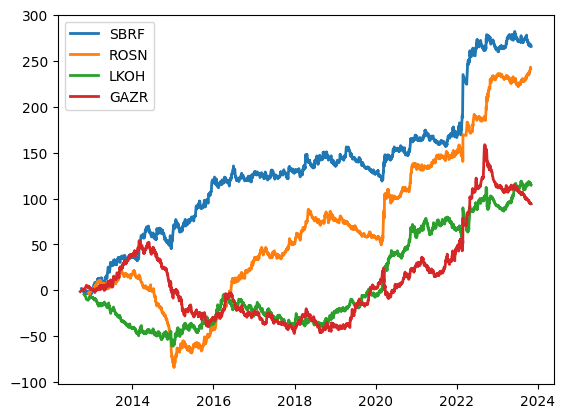

In [59]:
opt_res_id = 0
legend = []
for test_id in map(int, opt_res.test_ids.iloc[opt_res_id].split(".")[1:]):
    plt.plot([pos.close_date for pos in btests[test_id].positions], 
             btests[test_id].profits.cumsum(), 
             linewidth=2)
    legend.append(cfgs[test_id].ticker)
plt.legend(legend)